PHAN TICH VA TRUC QUAN HOA DU LIEU (DS201)

---
#BUOI 02 - PHÂN TÍCH VÀ THĂM DÒ DỮ LIỆU
6 - NGUYEN DIEU PHUONG (DS201.O11.1)

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
path_data = "/content/drive/MyDrive/Colab_Notebooks/UIT_Courses/DS105/DS105/LAB/Bai_tap_thuc_hanh_theo_tuan/Dataset/02_EDA_Model/EDA_Model_automobile_V2.csv"
df = pd.read_csv(path_data)

# 1. Kiểm tra kiểu dữ liệu và các giá trị khuyết

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    int64  
 2   make               200 non-null    object 
 3   aspiration         200 non-null    object 
 4   num-of-doors       200 non-null    object 
 5   body-style         200 non-null    object 
 6   drive-wheels       200 non-null    object 
 7   engine-location    200 non-null    object 
 8   wheel-base         200 non-null    float64
 9   length             200 non-null    float64
 10  width              200 non-null    float64
 11  height             200 non-null    float64
 12  curb-weight        200 non-null    int64  
 13  engine-type        200 non-null    object 
 14  num-of-cylinders   200 non-null    object 
 15  engine-size        200 non-null    int64  
 16  fuel-system        200 non

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,1,154,plymouth,std,four,sedan,fwd,front,93.7,0.803940,0.886111,50.8,2191,ohc,four,98,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609,7.580645,Low,0,1
1,0,122,peugot,turbo,four,wagon,rwd,front,114.2,0.955790,0.950000,58.7,3430,l,four,152,idi,3.70,3.52,21.0,95.0,4150.0,25,25,13860,9.400000,Low,1,0
2,0,102,subaru,turbo,four,sedan,4wd,front,97.0,0.826526,0.908333,54.3,2510,ohcf,four,108,mpfi,3.62,2.64,7.7,111.0,4800.0,24,29,11259,9.791667,Medium,0,1
3,0,145,jaguar,std,four,sedan,rwd,front,113.0,0.959154,0.966667,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176.0,4750.0,15,19,32250,15.666667,High,0,1
4,-1,93,mercedes-benz,turbo,four,sedan,rwd,front,115.6,0.973570,0.995833,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123.0,4350.0,22,25,31600,10.681818,Medium,1,0


In [ ]:
for name in df.columns:
  print(name, df[name].unique(), sep = '\n' )

symboling
[ 1  0 -1  2  3 -2]
normalized-losses
[154 122 102 145  93  94  78 161 168 256  85 153 134 128 188 150 104 125
  91  98  95 108  83  74  65 231  87 106 148 101  89 186 115 142 192 118
 164 119 121  77 103 113 129 110 197 137 107 158  81 194  90]
make
['plymouth' 'peugot' 'subaru' 'jaguar' 'mercedes-benz' 'volkswagen'
 'honda' 'toyota' 'dodge' 'bmw' 'mitsubishi' 'nissan' 'saab' 'isuzu'
 'porsche' 'chevrolet' 'volvo' 'mazda' 'alfa-romero' 'renault' 'audi'
 'mercury']
aspiration
['std' 'turbo']
num-of-doors
['four' 'two']
body-style
['sedan' 'wagon' 'hatchback' 'hardtop' 'convertible']
drive-wheels
['fwd' 'rwd' '4wd']
engine-location
['front' 'rear']
wheel-base
[ 93.7 114.2  97.  113.  115.6  97.3 120.9  96.5 107.9  97.2  94.5  95.9
  96.9 103.5  96.3  98.4 101.2  99.1  94.3  89.5 110.  106.7  95.7 104.5
 109.1 100.4  93.3 102.4  98.8 104.3  99.2  93.1  88.6  96.6  96.1 104.9
  95.3  99.8  88.4 112.  102.9 103.3  96.  102.  102.7 105.8  86.6  91.3
 108.   99.4  95.1  93. ]
lengt

<Axes: >

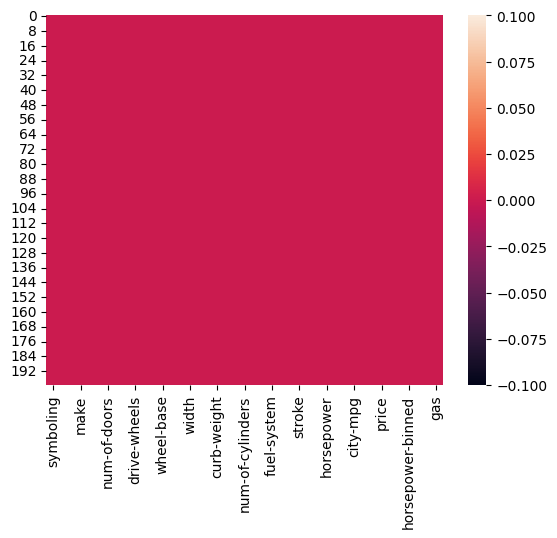

In [ ]:
sns.heatmap(df.isnull())

Từ các kết quả show ra ta thấy, bộ dữ liệu đã có kiểu dữ liệu phù hợp và không có giá trị bị khuyết

# 2. Phân loại các biến số của bộ dữ liệu, kiểm tra mức đối xứng của dữ liệu

mean, median, mode

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    int64  
 2   make               200 non-null    object 
 3   aspiration         200 non-null    object 
 4   num-of-doors       200 non-null    object 
 5   body-style         200 non-null    object 
 6   drive-wheels       200 non-null    object 
 7   engine-location    200 non-null    object 
 8   wheel-base         200 non-null    float64
 9   length             200 non-null    float64
 10  width              200 non-null    float64
 11  height             200 non-null    float64
 12  curb-weight        200 non-null    int64  
 13  engine-type        200 non-null    object 
 14  num-of-cylinders   200 non-null    object 
 15  engine-size        200 non-null    int64  
 16  fuel-system        200 non

In [9]:
def get_num_columns(database: pd.DataFrame) -> pd.DataFrame:
  _nums = database.select_dtypes(include = 'number').columns.to_list()

  return database[_nums].copy()

In [10]:
def get_obj_columns(database: pd.DataFrame) -> pd.DataFrame:
  _objs = database.select_dtypes(include = 'object').columns.to_list()

  return database[ _objs].copy()

In [ ]:
def check_symmetry_column(column : pd.Series, _range = 0.2) -> bool:
  _mean = column.mean()
  _median = column.median()
  _mode = column.mode().median()

  _threshold = [_median*(1-_range), _median*(1+_range)]

  condition1 = bool( (_threshold[0] <= _mean) & (_mean <= _threshold[1]))
  condition2 = bool( (_threshold[0] <= _mode) & (_mode <= _threshold[1]))

  if condition2:
    return True
  return False

In [ ]:
def check_symmetry_database(database: pd.DataFrame, _range = 0.2):

  dict_symmetry = {}

  for i in database.columns:
    dict_symmetry[i] = check_symmetry_column(database[i])

  return dict_symmetry


In [ ]:
df2 = get_num_columns(df)

In [ ]:
check_symmetry_database(df2)

{'symboling': False,
 'normalized-losses': True,
 'wheel-base': True,
 'length': True,
 'width': True,
 'height': True,
 'curb-weight': True,
 'engine-size': True,
 'bore': True,
 'stroke': True,
 'compression-ratio': True,
 'horsepower': False,
 'peak-rpm': True,
 'city-mpg': True,
 'highway-mpg': True,
 'price': False,
 'city-L/100km': True,
 'diesel': True,
 'gas': True}

# 3. Kiểm tra ảnh hưởng của các biến số đến giá xe

In [ ]:
def check_correlation_p_value(column1: pd.Series, column2: pd.Series,
                              coef_threshold = 0.5, p_threshold = 0.05,
                              include = None) -> list:



  includes = [None, 'all']
  assert include in includes, "include just be None or 'all'"

  _coef, _p_value = stats.pearsonr(column1, column2)

  if _p_value > p_threshold:
    return False
  if _coef >= coef_threshold or _coef <= -1.0*coef_threshold:
    if include == 'all':
      return [True, _coef, _p_value]
    return True

  return False

In [ ]:
def check_affection(database: pd.DataFrame, target_column: str, coef_threshold = 0.1, p_threshold = 0.05, include = None) -> list:



  includes = [None, 'all']
  assert include in includes, "include just be None or 'all'"

  _affection = []

  for i in database.columns:
    if i == target_column:
      continue
    _affect = check_correlation_p_value(database[i], database[target_column], coef_threshold = coef_threshold, p_threshold = p_threshold, include=include)
    if _affect and include == 'all':
      _affection.append([i, _affect[1], _affect[2]])
    elif _affect:
      _affection.append(i)


  return _affection

In [ ]:
df3 = get_num_columns(df)

In [ ]:
affection_df3 = check_affection(df3, 'price', coef_threshold = 0.5, p_threshold = 0.05, include= None)
affection_df3

['wheel-base',
 'length',
 'width',
 'curb-weight',
 'engine-size',
 'bore',
 'horsepower',
 'city-mpg',
 'highway-mpg',
 'city-L/100km']

Text(0.5, 1.0, 'abc')

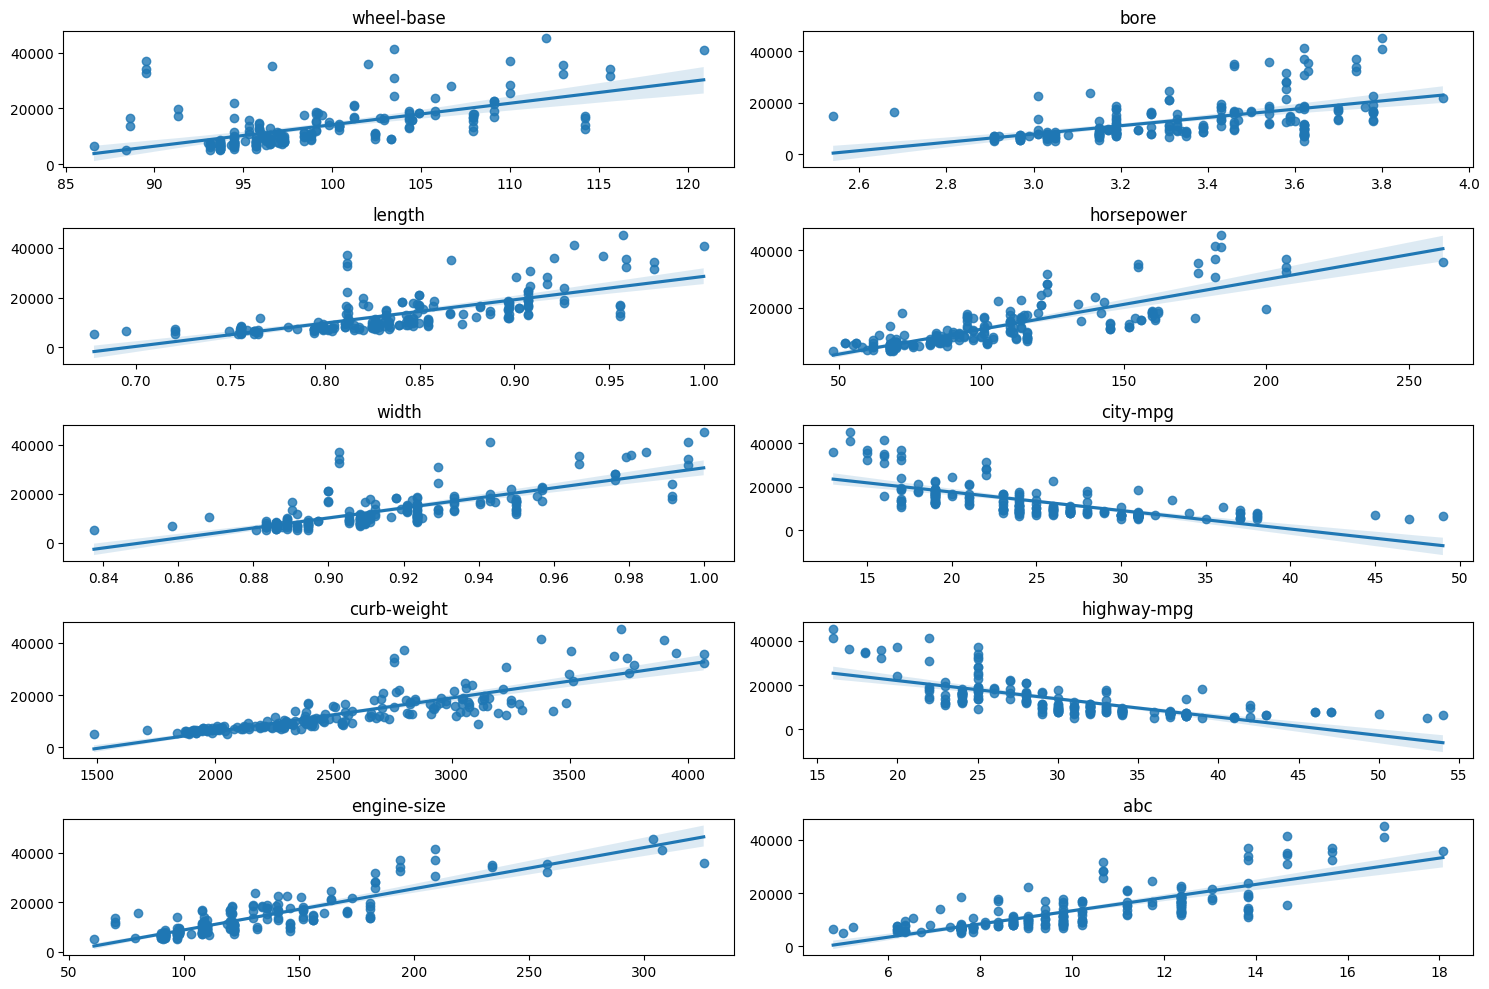

In [ ]:
n_cols, n_rows = 2, 5
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3* n_rows, 5 * n_cols), layout="tight")

i = 0
for col_index in range(n_cols):
  for row_index in range(n_rows):
    sns.regplot(x = affection_df3[i], y = 'price', data = df3, ax = axs[row_index][col_index])
    axs[row_index][col_index].set_title(affection_df3[i])
    axs[row_index][col_index].set_ylabel('')
    axs[row_index][col_index].set_xlabel('')

    i += 1


# Câu 4. Biến nào ảnh hưởng nhiều nhất, biến nào ảnh hưởng ít nhất với 'price'

In [ ]:
df4 = get_num_columns(df)

In [ ]:
check_affection(df4, 'price', coef_threshold = 0.5, p_threshold = 0.05, include= 'all')

[['wheel-base', 0.5834503691357351, 1.2325194556069247e-19],
 ['length', 0.6921854275742376, 7.370253024474713e-30],
 ['width', 0.7503572990942348, 1.9064889360250413e-37],
 ['curb-weight', 0.8342900094655071, 4.262373265230974e-53],
 ['engine-size', 0.8719068307580168, 2.5889078562374994e-63],
 ['bore', 0.5410744665868136, 1.3234977628655297e-16],
 ['horsepower', 0.8090208109055185, 1.4076405901762812e-47],
 ['city-mpg', -0.6854458321436423, 4.2784162925377873e-29],
 ['highway-mpg', -0.7035476153448258, 3.3977438397312577e-31],
 ['city-L/100km', 0.7891430817652264, 8.734891423945004e-44]]

In [ ]:
check_affection(df3, 'price', coef_threshold = 0.5, p_threshold = 0.05, include= None)

['wheel-base',
 'length',
 'width',
 'curb-weight',
 'engine-size',
 'bore',
 'horsepower',
 'city-mpg',
 'highway-mpg',
 'city-L/100km']

In [ ]:
def get_strong_week_affection(database: pd.DataFrame, target_column: str, coef_threshold = [0.3, 0.5, 0.8], p_threshold = 0.05) -> dict:
  _strong_affection = []
  _week_affection = []

  _affection = check_affection(database= database, target_column= target_column, coef_threshold=coef_threshold[0], p_threshold=p_threshold, include = 'all')

  for column in _affection:
    if column[1] <= -1*coef_threshold[2] or  column[1] >= 1*coef_threshold[2]:
      _strong_affection.append(column)
    elif column[1] >= -1*coef_threshold[1] and column[1] <= coef_threshold[1]:
      _week_affection.append(column)


  return {'strong_affection': _strong_affection,
          'week_affection': _week_affection}



In [ ]:
get_strong_week_affection(df4, 'price')

{'strong_affection': [['curb-weight',
   0.8342900094655071,
   4.262373265230974e-53],
  ['engine-size', 0.8719068307580168, 2.5889078562374994e-63],
  ['horsepower', 0.8090208109055185, 1.4076405901762812e-47]],
 'week_affection': []}

# 5. Kiểm tra kiểu dáng ảnh hưởng đến giá

In [ ]:
def check_anova(database: pd.DataFrame, compared_column: str, target_column: str):
  grouped_anova = database.groupby([compared_column])

  _compared_values = database[compared_column].unique()
  anova_results = []

  sub_group = []
  for value in _compared_values:
    sub_group.append(grouped_anova.get_group(value)[target_column])

  anova_results = stats.f_oneway(*sub_group)

  return anova_results

In [ ]:
check_anova(df, 'body-style', 'price')

F_onewayResult(statistic=8.949448940148814, pvalue=1.1768625961599905e-06)

Ta nhận thậy giá trị pvalue rất nhỏ, nên ta nhận xét rằng có sự khác biệt về các giá trị trung bình của price giữa các nhóm body-style

In [ ]:
from scikit_posthocs import posthoc_dunn

result = posthoc_dunn(df, val_col='price', group_col='body-style')

# in kết quả
print(result)


             convertible   hardtop  hatchback     sedan     wagon
convertible     1.000000  0.522281   0.000942  0.053713  0.047227
hardtop         0.522281  1.000000   0.004457  0.205017  0.170679
hatchback       0.000942  0.004457   1.000000  0.000188  0.030424
sedan           0.053713  0.205017   0.000188  1.000000  0.690047
wagon           0.047227  0.170679   0.030424  0.690047  1.000000


các cặp giá trị có p-value cao không có sự khác biệt về ý nghĩa thống kê -> ít ảnh hưởng đến giá

In [ ]:
result = result.sum()
result[result > 1.5]

convertible    1.624163
hardtop        1.902434
sedan          1.948965
wagon          1.938376
dtype: float64

# 6. Xe thuộc nhà sản xuật nào, kiểu dáng gì, và động cơ gì sẽ tốt nhất.

In [ ]:
df6 = df[['make', 'body-style', 'engine-type', 'price']].copy()

In [ ]:
df6.columns = ['make', 'bodystyle', 'enginetype', 'price']

In [ ]:
def get_value_influence(df6: pd.DataFrame, target_column: str, compared_column: list, max_target = 30000, include = None) -> list:
  df6_grp = df6.groupby(['make', 'bodystyle', 'enginetype'],
                           as_index = False).mean()
  df6_pivot = df6_grp.pivot(index = ['make', 'enginetype'], columns = ['bodystyle'])

  if include == 'max':
    result = [df6_pivot.max(axis=1).idxmax() + (df6_pivot.max().idxmax()[1],)]
  elif include == None:
    df_new = df6_pivot[df6_pivot > max_target]
    df_new = df_new.stack()
    result = df_new.index.to_list()

  return result


In [ ]:
get_value_influence(df6, 'price', ['make', 'body-style', 'engine-type'], max_target=25000)

[('bmw', 'ohc', 'sedan'),
 ('jaguar', 'dohc', 'sedan'),
 ('jaguar', 'ohcv', 'sedan'),
 ('mercedes-benz', 'ohc', 'hardtop'),
 ('mercedes-benz', 'ohc', 'sedan'),
 ('mercedes-benz', 'ohc', 'wagon'),
 ('mercedes-benz', 'ohcv', 'convertible'),
 ('mercedes-benz', 'ohcv', 'hardtop'),
 ('mercedes-benz', 'ohcv', 'sedan'),
 ('porsche', 'ohcf', 'convertible'),
 ('porsche', 'ohcf', 'hardtop')]

In [ ]:
get_value_influence(df6, 'price', ['make', 'body-style', 'engine-type'], include = 'max')

[('mercedes-benz', 'ohcv', 'hardtop')]

# 7. 3 biến phân loại ảnh hưởng đến giá nhất

In [7]:
df7 = df.copy()

In [4]:
import re
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
def get_category_influence(df:pd.DataFrame, target_column, get_top = None, plimit = 1e-04, ascending =True):
  _df = get_obj_columns(df)
  _category = _df.columns
  _category = [re.sub('\W', '', i) for i in _category]
  _df.columns = _category
  _df[target_column] = df[target_column]


  model = ols(target_column + ' ~ ' + ' + '.join(_category), data = _df).fit()
  # thực hiện kiểm định ANOVA
  anova_table = sm.stats.anova_lm(model)

  if ascending:
    anova_table = anova_table[anova_table['PR(>F)'] < plimit]
  else:
    anova_table = anova_table[anova_table['PR(>F)'] >= plimit]


  try:
    get_top = int(get_top)

    anova_table = anova_table.sort_values(by = 'PR(>F)', ascending= ascending)[:get_top]

    return anova_table.index.to_list()
  except:
    return anova_table.index.to_list()


In [22]:
get_category_influence(df7, target_column = 'price', get_top=3)

['make', 'drivewheels', 'enginetype']

# 8. 4 biến phân loại ít ảnh hưởng đến giá nhất

In [30]:
get_category_influence(df7, target_column = 'price', get_top=4, plimit = 0, ascending= False)

['numofdoors', 'fuelsystem', 'bodystyle', 'enginelocation']

# 9. Trong các biến phân loại, biến nào ảnh hưởng đến giá xe

In [32]:
get_category_influence(df7, target_column = 'price', plimit = 1e-4)

['make',
 'aspiration',
 'drivewheels',
 'enginelocation',
 'enginetype',
 'numofcylinders',
 'horsepowerbinned']

# 10. Đánh giá giá trị ngoại lề.

In [114]:
def get_outlier(df: pd.Series):
  # Calculate Q1, Q3 and IQR
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1

  df_outliers = df[(df < Q1 - 1.5 * IQR) | (df > Q3 + 1.5 * IQR)].values.tolist()
  outlier_percent = 100.0*(len(df_outliers)/len(df))

  return(df_outliers, outlier_percent)



In [115]:
get_outlier(df7['price'])

([32250,
  31600,
  40960,
  30760,
  37028,
  35056,
  41315,
  36880,
  45400,
  35550,
  36000,
  34028,
  32528,
  34184],
 7.000000000000001)

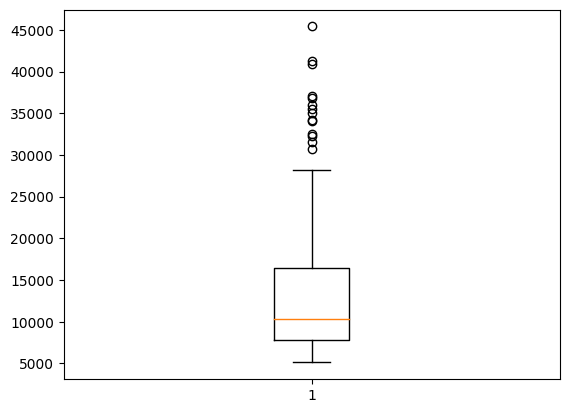

In [116]:
plt.boxplot(df7['price'])
plt.show()